# Loan prediction problem

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
print("The modules are imported")

The modules are imported


In [2]:
# Importing the training dataset

train = pd.read_csv("Train_Data.csv")
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# Importing the testing dataset

test = pd.read_csv("Test_Data.csv")
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
# Let's make a copy of training and testing datasets

train_original = train.copy()
test_original  = test.copy()

In [5]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

Here, we can clearly see that the training data contains 12 independent variables and one target variable and the testing dataset contains 12 independent variables.
We have similar features in the training and testing  except the Loan_Status. We will predict the Loan_Status using the built model using the training data.

In [7]:
# Printing the datatypes of each variable of train dataset

train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
# Printing the shape of the train dataset

train.shape

(614, 13)

In [9]:
# Printing the datatypes of each variable of test dataset

test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [10]:
# Printing the shape of the train dataset

test.shape

(367, 12)

We have 614 rows and 13 columns in the train dataset whereas 367 rows and 12 columns in the test dataset.

# <B>Univariate Analysis</B>

Let us first look at the target variable(Loan_Status). As it is a categorical variable, let us take a look
at the frequency table of the target variable.

In [11]:
train["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

This indicates that 422 people got the loan approved and 192 didn't got the approval.

In [12]:
# Normalize can be set True to print proportions instead of number

train["Loan_Status"].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

This indicates that 68.73% of people got the loan approval and 31.27% didn't got the approval.

614


Text(0.5, 1.0, 'Loan Status')

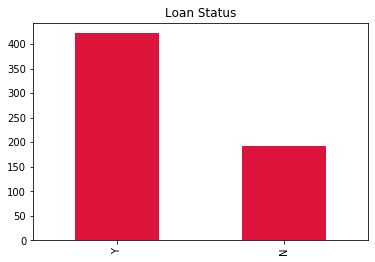

In [13]:
# Plotting the bar chart of the target variable

print(train["Loan_Status"].value_counts().sum())
train["Loan_Status"].value_counts().plot.bar(color="crimson")
plt.title("Loan Status")

Out of 614 people, loans of 422 (approximately 69%) are approved.

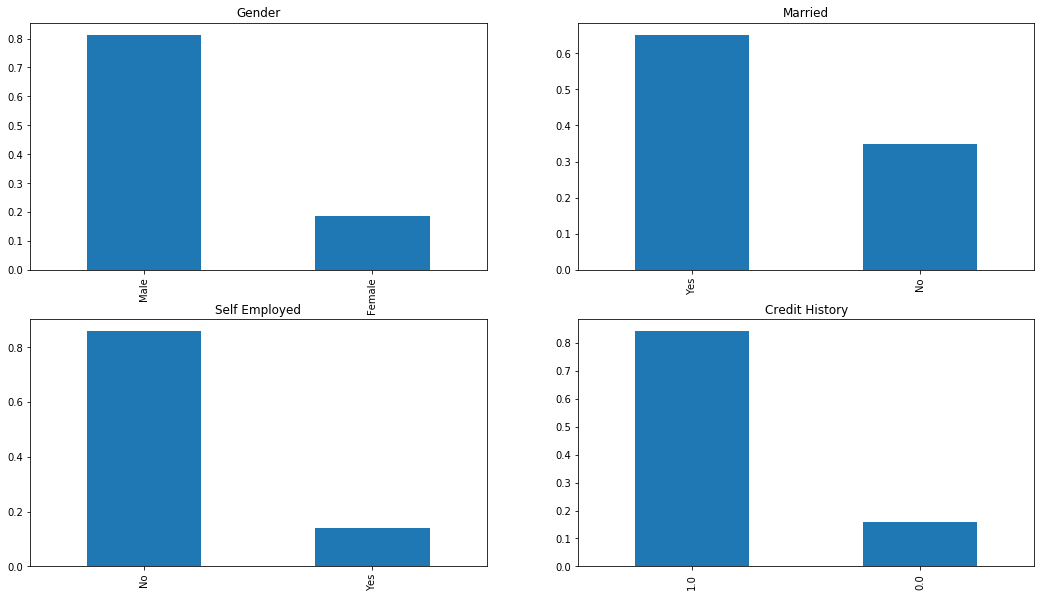

In [14]:
# Plotting the graph for all the Categorical Independent Variables

plt.figure(1)
plt.subplot(2,2,1)
train["Gender"].value_counts(normalize=True).plot.bar(figsize=(18,10),title="Gender")
plt.subplot(2,2,2)
train["Married"].value_counts(normalize=True).plot.bar(figsize=(18,10),title="Married")
plt.subplot(2,2,3)
train["Self_Employed"].value_counts(normalize=True).plot.bar(figsize=(18,10),title="Self Employed")
plt.subplot(2,2,4)
train["Credit_History"].value_counts(normalize=True).plot.bar(figsize=(18,10),title="Credit History")

From graph 1, we can infer that 80% of the applicants are male.
From graph 2, we can infer that 60% of the applicants are married.
From graph 3,we can infer that 15% of the applicants are self-employed.
From graph 3,we can infer that 85% of the applicants have repaid their debts.

Let us now visualise the ordinal variables. Ordinal variables are the categorical features having some order involved viz.(Dependents, Education, Property_Area) 

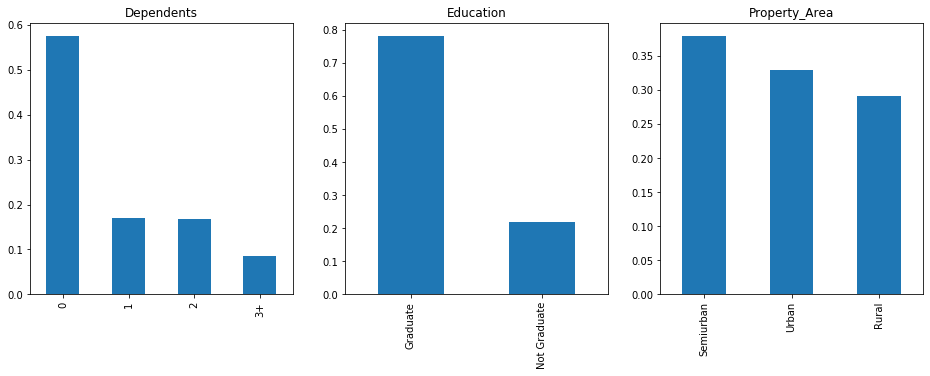

In [15]:
# Plotting the bar graph of Ordinal variables

plt.figure(1)
plt.subplot(1,3,1)
train["Dependents"].value_counts(normalize=True).plot.bar(figsize=(16,5), title="Dependents")
plt.subplot(1,3,2)
train["Education"].value_counts(normalize=True).plot.bar(figsize=(16,5), title="Education")
plt.subplot(1,3,3)
train["Property_Area"].value_counts(normalize=True).plot.bar(figsize=(16,5), title="Property_Area")
plt.show()

From the above graphs, we can infer that
(i) Most of the applicants do not have any dependents.
(ii) Around 78% of the applicants are graduate.
(iii) Around 38% of the applicants are from semiurban area, around 33% are from urban and around 29% are from rural area.

Till now we have seen the categorical and ordinal variables, now let's visualize the numerical variables. Let's look at the applicants income.

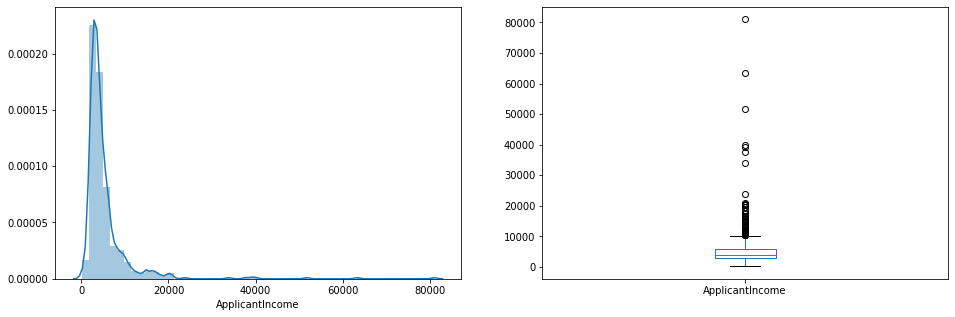

In [16]:
# Plotting the graph of numerical variables

plt.figure(1)
plt.subplot(1,2,1)
sns.distplot(train["ApplicantIncome"], hist=True)
plt.subplot(1,2,2)
train["ApplicantIncome"].plot.box(figsize=(16,5))

It is clear from the distribution plot that the distribution of the Applicants income is not normal and is skewed towards the right. That is most of the datapoints are concentrated on the left side of the graph and income mostly lies between 0 to 20000.
The boxplot confirms the presence of a lot of outliers. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different backgrounds.

Let's now segregate the applicant's income by education

Text(0.5, 0.98, '')

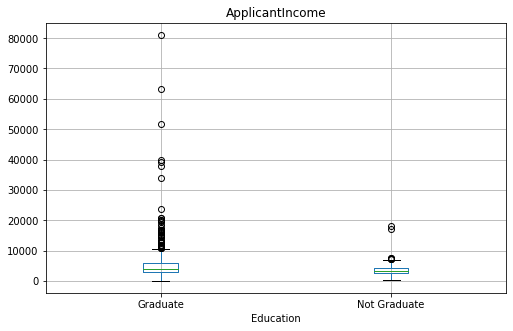

In [17]:
# Segregation of Applicant's income by education and plotting the boxplot

train.boxplot(column='ApplicantIncome', by='Education',figsize=(8,5))
plt.suptitle("")

From the above boxplot, it is quite clear that graduates tend to have more income in comparison to non-graduates. Also, there are higher number of graduates with very high incomes which are actually the outliers.

Let's look at the co-applicant's income

Text(0.5, 1.0, "Boxplot of Co-applicant's income")

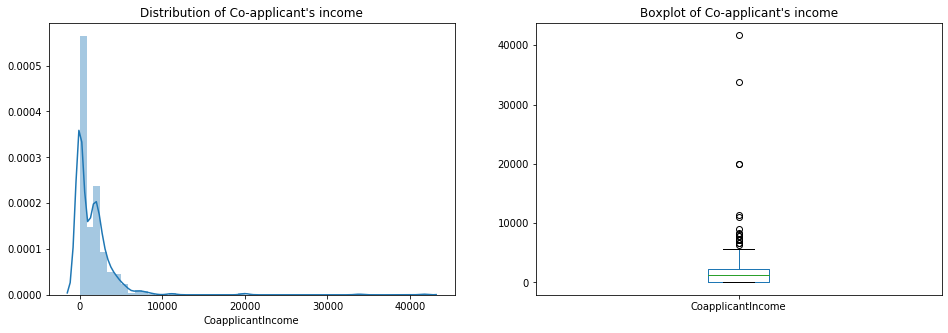

In [18]:
# Distribution plot and boxplot of co-applicant's income

plt.figure(1)
plt.subplot(1,2,1)
sns.distplot(train["CoapplicantIncome"])
plt.title("Distribution of Co-applicant's income")
plt.subplot(1,2,2)
train["CoapplicantIncome"].plot.box(figsize=(16,5))
plt.title("Boxplot of Co-applicant's income")

We see similar distribution as that of applicant income. Majority of co-applicants incomes lies between 0 to 5000. There are many outliers present in the data. Also, the distribution is not normal and is skewed to the right.


Let's look at the distribution of LoanAmount variable

Text(0.5, 1.0, 'Boxplot of Loan Amount')

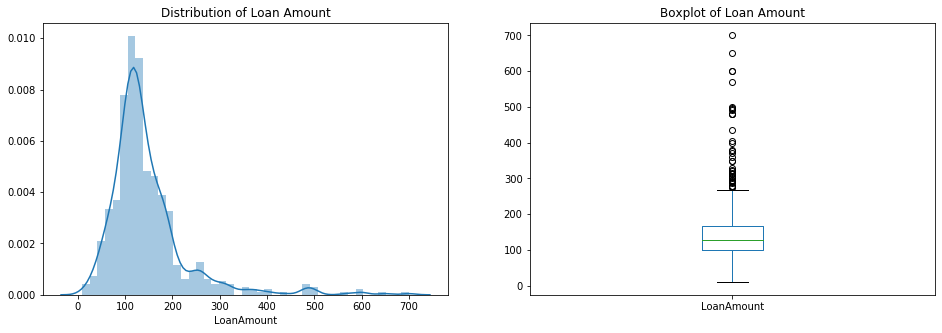

In [19]:
# Distribution plot and boxplot of Loan Amount variable

plt.figure(1)
plt.subplot(1,2,1)
df = train.dropna()
sns.distplot(train["LoanAmount"])
plt.title("Distribution of Loan Amount")
plt.subplot(1,2,2)
train["LoanAmount"].plot.box(figsize=(16,5))
plt.title("Boxplot of Loan Amount")

We can clearly see that the distribution is fairly normal (skewed a bit towards right). Also, there are lots of outliers present in the Loan amount column.

# Bivariate Analysis

After looking at each variable individually in univariate analysis, we will now explore them with respect to the target variable i.e. Loan_Status.

<B>Categorical Independent variable v/s Target variable</B>

In [20]:
# Gender variable wrt Loan_Status 

Gender = pd.crosstab(train["Gender"], train["Loan_Status"])
Gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


Text(0.5, 1.0, 'Stacked Barchart of Gender v/s Loan Status')

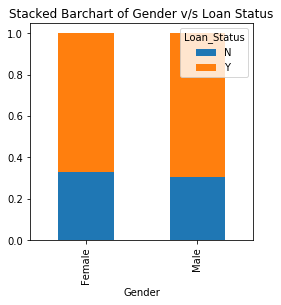

In [21]:
# Barchart of Gender v/s Loan_Status

Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.title("Stacked Barchart of Gender v/s Loan Status")

It is quite clear from the bar chart that the proportion of male and female applicants are more or less same for both approved and unapproved loans

Text(0.5, 1.0, 'Barchart of Self Employed v/s Loan Status')

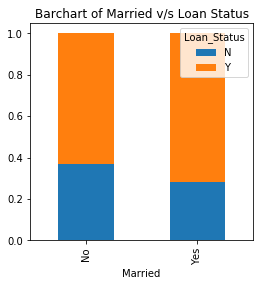

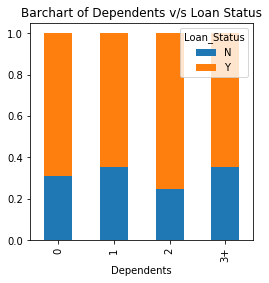

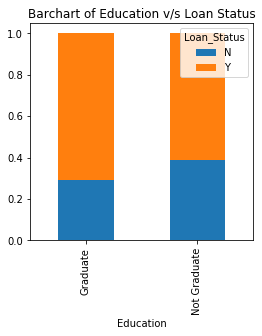

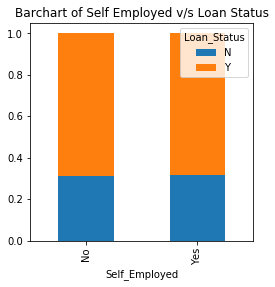

In [22]:
# Barcharts of explanatory variables wrt target variable

Married = pd.crosstab(train["Married"], train["Loan_Status"])
Dependents = pd.crosstab(train["Dependents"], train["Loan_Status"])
Education = pd.crosstab(train["Education"], train["Loan_Status"])
Self_Employed = pd.crosstab(train["Self_Employed"], train["Loan_Status"])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.title("Barchart of Married v/s Loan Status")
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.title("Barchart of Dependents v/s Loan Status")
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.title("Barchart of Education v/s Loan Status")
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar", stacked = True, figsize=(4,4))
plt.title("Barchart of Self Employed v/s Loan Status")

From the above graphs, we can infer that
(i)The proportions of married applicants is higher for the approved loans.
(ii)The distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan Status.
(iii)The proportion of graduates is higher for the approved loans.
(iv)The distribution of Loan Status is same irrespective of the situation whether the applicants are self employed or not.

Text(0.5, 1.0, 'Barchart of Property_Area v/s Loan_Status')

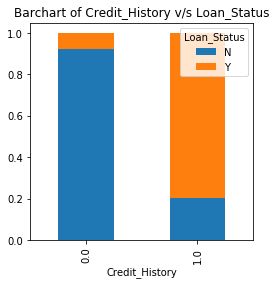

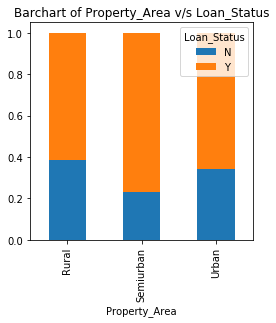

In [23]:
# Barchart of Credit_History and Property_Area v/s Loan_Status

Credit_History = pd.crosstab(train["Credit_History"], train["Loan_Status"])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.title("Barchart of Credit_History v/s Loan_Status")
Property_Area = pd.crosstab(train["Property_Area"], train["Loan_Status"])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.title("Barchart of Property_Area v/s Loan_Status")

From graph 1, it seems like the applicants with credit history 1 are more likely to get their loans approved.
From graph 2, it is clear that the proportion of loans getting approved in semiurban area is higher than rural and urban areas.

<B>Numerical Independent Variables v/s Target Variables</B>

We will try to find the mean income of people for which the loan has been approved v/s the mean income of people for which the loan has not been approved.

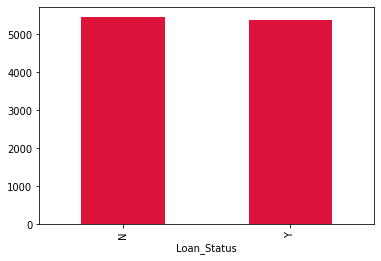

In [25]:
# Grouping Loan_Status wrt Applicant's Income and then plotting the barchart for the same

train.groupby("Loan_Status")["ApplicantIncome"].mean().plot.bar(color = "Crimson")

Here y-axis represents the mean applicant income. Clearly we don't see any significant change in the mean income.

Let's make bins for the applicants income variable based on the values in it and analyse the corresponding loan status for each bin.

In [54]:
train["ApplicantIncome"].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [26]:
bins = [0,2500,4000,6000,81000]
groups = ["Low","Average", "High","Very high"]
train["Income_bins"] = pd.cut(train["ApplicantIncome"], bins, labels=groups)

In [27]:
Income_bins = pd.crosstab(train["Income_bins"], train["Loan_Status"])
Income_bins

Loan_Status,N,Y
Income_bins,,
Low,34,74
Average,67,159
High,45,98
Very high,46,91


Text(0.5, 1.0, 'Income v/s Loan Status')

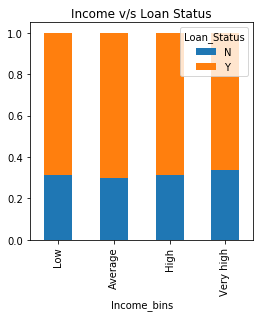

In [28]:
Income_bins.div(Income_bins.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.title("Income v/s Loan Status")

From the graph above, we can infer that the applicant's income does not affect much the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant's income is high, the chances of loan approval will also be high.

Similarly we will analyse the coapplicant's income and loan amount variable in the similar manner.

In [29]:
train["CoapplicantIncome"].describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

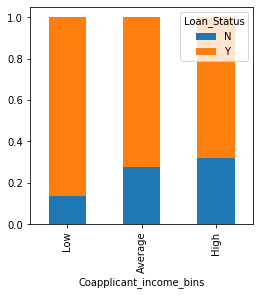

In [30]:
bins_ = [0,1000,3000,4200]
group_ = ["Low","Average","High"]
train["Coapplicant_income_bins"] = pd.cut(train["CoapplicantIncome"], bins_ , labels=group_)
Coapplicant_income_bins = pd.crosstab(train["Coapplicant_income_bins"], train["Loan_Status"])
Coapplicant_income_bins.div(Coapplicant_income_bins.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

This graphs shows that if applicant's income is less, the chances of loan approval is high. But this does not look right. The possible reason behind this may be that most of the applicant's don't have any coapplicant so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it.

Let us combine the applicant income and coapplicant income and see the combined effect of total income on loan status.

Text(0.5, 1.0, 'Total Income v/s Loan Status')

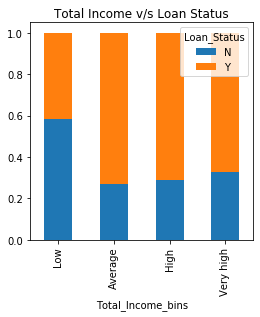

In [31]:
train["Total_Income"] = train["ApplicantIncome"] + train["CoapplicantIncome"]
bins = [0,2500,4000,6000,81000]
groups = ["Low","Average","High","Very high"]
train["Total_Income_bins"] = pd.cut(train["Total_Income"], bins, labels=groups)
Total_Income_bins = pd.crosstab(train["Total_Income_bins"],train["Loan_Status"])
Total_Income_bins.div(Total_Income_bins.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.title("Total Income v/s Loan Status")

We see that the proportion of loans getting approved for applicants having low total income is very less as compared to the applicants with average, high and very high income. 

Let's visualize the loan amount variable

In [32]:
# Finding statistical summary
train["LoanAmount"].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

Text(0, 0.5, 'Percentage')

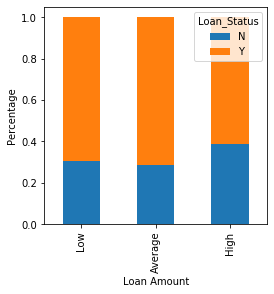

In [33]:
# Plotting stacked plot of Loan Amount
bins = [0,100,200,700]
groups = ["Low","Average","High"]
train["LoanAmount_bin"] = pd.cut(train["LoanAmount"], bins, labels=groups)
LoanAmount_bin = pd.crosstab(train["LoanAmount_bin"], train["Loan_Status"])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel("Loan Amount")
plt.ylabel("Percentage")

It can be seen that the proportion of approved loans is higher for Low and Average loan amount as compared to that of high loan amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less.

Let's drop the bins which we created for the exploration part.

In [34]:
# Dropping the bins
train = train.drop(["Income_bins","Coapplicant_income_bins","LoanAmount_bin","Total_Income_bins","Total_Income"], axis=1)

In [35]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Now, we replace 3+ in Dependents to 3 to make it a numerical variable

In [36]:
# Replacing 3+ by 3
train["Dependents"].replace("3+",3, inplace=True)
test["Dependents"].replace("3+",3, inplace=True)

Let us now convert the target variable's categories into 0 or 1 so that we can find its correlation with numerical variables.

In [37]:
# Replacing N by 0 and Y by 1
train["Loan_Status"].replace("N",0, inplace=True)
train["Loan_Status"].replace("Y",1, inplace=True)

Now let's look at the correlation between all the numerical variables. We will use the heatmap to visualize the correlation. Heatmaps visualize data through variation in coloring. The varibles with the darker color means their correlation is more.

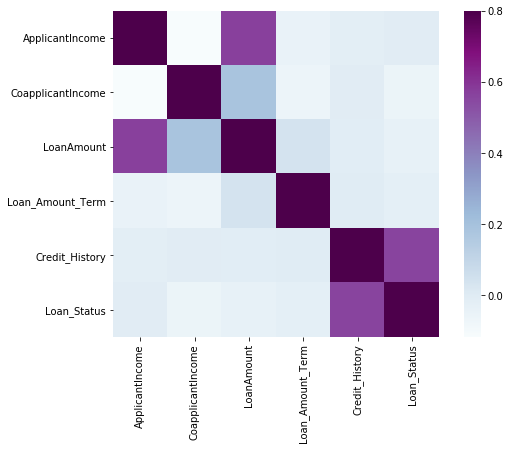

In [38]:
#Finding correlation and visualize it by heatmap
matrix = train.corr()
f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu")

We can clearly see that the most correlated variables are (ApplicantIncome and LoanAmount) and (Credit_History and Loan_Status). LoanAmount is also correlated with the CoapplicantIncome.

# Missing Value and Outlier Treatment

After exploring all the variables in our data, we can now impute the missing values and treat the outliers because missing value and outliers can have an adverse effect on model performance.

Let's list out feature-wise count of missing values. 

In [39]:
# Checking for missing values
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History features.

Now we will treat the missing values in all the features one by one. We can consider these methods to fill the missing values.
For numerical variable : Imputation using mean and median.
For categorical variable : Imputation using mode.    

There are missing values in Gender, Married, Dependents, Credit_History and Self_Employed features. So we can fill them using the mode of the features.

In [40]:
# Checking the value count of each categorical variables
print(train["Gender"].value_counts())
print("\n")
print(train["Married"].value_counts())
print("\n")
print(train["Dependents"].value_counts())
print("\n")
print(train["Credit_History"].value_counts())
print("\n")
print(train["Self_Employed"].value_counts())
print("\n")
print(train["Loan_Amount_Term"].value_counts())

Male      489
Female    112
Name: Gender, dtype: int64


Yes    398
No     213
Name: Married, dtype: int64


0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64


1.0    475
0.0     89
Name: Credit_History, dtype: int64


No     500
Yes     82
Name: Self_Employed, dtype: int64


360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


In [41]:
# Imputing missing values by mode
train["Gender"].fillna(train["Gender"].mode()[0], inplace=True)
train["Married"].fillna(train["Married"].mode()[0], inplace=True)
train["Dependents"].fillna(train["Dependents"].mode()[0], inplace=True)
train["Credit_History"].fillna(train["Credit_History"].mode()[0], inplace=True)
train["Self_Employed"].fillna(train["Self_Employed"].mode()[0], inplace=True)
train["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].mode()[0], inplace=True)

Now will we see the loan amount variable. As it is a numerical variable, we can use mean or median to impute the missing values. We will use the median to impute the missing value as there are many outliers present in the LoanAmount variable. So, we cannot take the mean as it is highly affected by the presence of outliers.

In [42]:
# Imputing missing values by median
train["LoanAmount"].fillna(train["LoanAmount"].median(), inplace=True)

Let us now check whether all the missing values are filled in the dataset.

In [43]:
# Checking the missing values
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Here we can clearly see that all the missing observations have been filled in the training dataset. Let us now fill all the missing observations in the testing dataset as well.

In [44]:
# Filling missing values with mode or median
test["Gender"].fillna(test["Gender"].mode()[0], inplace=True)
test["Married"].fillna(test["Gender"].mode()[0], inplace=True)
test["Dependents"].fillna(test["Dependents"].mode()[0], inplace=True)
test["Credit_History"].fillna(test["Credit_History"].mode()[0], inplace=True)
test["Self_Employed"].fillna(test["Self_Employed"].mode()[0], inplace=True)
test["Loan_Amount_Term"].fillna(test["Loan_Amount_Term"].mode()[0], inplace=True)
test["LoanAmount"].fillna(test["LoanAmount"].median(), inplace=True)

<B>Outlier Treatment</B>

As we saw earlier in univariate analysis, LoanAmount contains outliers so we have to treat them as presence of outliers affects the distribution of data.

Due to outliers bulk of the data in LoanAmount is at the left and the right tail is longer. This is called right skewness. On way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values. So, we get a distribution similar to normal distribution.

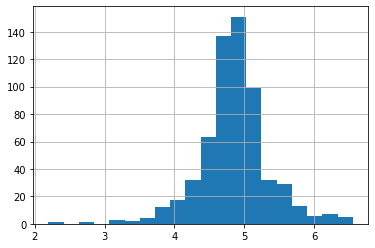

In [45]:
# Applying log transformation on training dataset and plotting histogram of the same
train["LoanAmount_log"] = np.log(train["LoanAmount"])
train["LoanAmount_log"].hist(bins=20)

In [46]:
# Applying log transformation on testing dataset
test["LoanAmount_log"] = np.log(test["LoanAmount"])

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided.

# Logistic Regression and Prediction of the test dataset

Logistic Regression is a classification algorithm. It is used when the dependent variable (target variable) is categorical. It is used for predicting binary outcomes like in our case Loan_Status to be either yes or no. 

In [47]:
# Let's drop the Loan_ID variable as it do not have any effect on Loan_Status

train = train.drop("Loan_ID", axis=1)
test = test.drop("Loan_ID",axis=1)

In [48]:
# Using scikit learn library for making different models
# Scikit requires target variable in a separate dataset
# Dropping our target variable from the train dataset and saving it to another dataset

x = train.drop("Loan_Status", axis=1)
y = train.Loan_Status

Logistic Regression takes only numerical variable as an input. That's why we need to change the categorical variables into dummy variables. Dummy varibles turn categorical variables into a series of 0 and 1.

In [49]:
# Converting categorical variables into dummy variable

x = pd.get_dummies(x)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

Now we will train the model on the training dataset and make prediction for the test dataset. Also we can divide the train dataset into two parts: train and validation. We can train the model on this train part and using that make predictions for the validation part. In this way, we can validate our predictions as we have the true prediction for the validation part.

In [50]:
# Importing train_test_split module from sklearn

from sklearn.model_selection import train_test_split 
x_train,x_cv,y_train,y_cv = train_test_split(x, y, test_size=0.3)

The dataset has been divided into training and validation part. Let us import logisticRegression and accuracy_score from sklearn and fit the logistic regression model. 

In [51]:
# Model Fitting

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Let's predict the Loan_Status for validation set and calculate its accuracy.

In [52]:
# Prediction of Loan_Status

pred_cv = model.predict(x_cv)

In [53]:
# Calculating accuracy to check the accuracy of our predictions

accuracy_score(y_cv, pred_cv)

0.827027027027027

This shows that our predictions are almost 80% accurate i.e. we have identified 80% of the Loan_Status correctly. 

In [54]:
# Making predictions for the test dataset

pred_test = model.predict(test)

In [55]:
Submission = pd.read_csv("Sample_Submission.csv")
Submission["Loan_Status"] = pred_test
Submission["Loan_ID"] = test_original["Loan_ID"]
Submission["Loan_Status"].replace(0, "N", inplace=True)
Submission["Loan_Status"].replace(1, "Y", inplace=True)

In [56]:
pd.DataFrame(Submission, columns=["Loan_ID", "Loan_Status"]).to_csv("Logistic.csv")

Our accuracy is 0.7847.

# Logistic Regression Using Stratified k-folds Cross Validation

In [57]:
# Importing StratifiedKFold from sklearn and fitting the model
from sklearn.model_selection import StratifiedKFold

# Cross validation Logistic Model with Stratified 5 folds and making predictions for the test dataset
i=1
mean_accuracy_score=0
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(x,y):
    print("\n{} of kfold {}".format(i,kf.n_splits))
    xtr,xvl = x.loc[train_index], x.loc[test_index]
    ytr,yvl = y.loc[train_index], y.loc[test_index]
    Model = LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print("accuracy_score", score )
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]
    mean_accuracy_score+= score/5
print("Mean_accuracy_score is ",mean_accuracy_score)


1 of kfold 5
accuracy_score 0.8048780487804879

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7804878048780488

4 of kfold 5
accuracy_score 0.7886178861788617

5 of kfold 5
accuracy_score 0.7950819672131147
Mean_accuracy_score is  0.8012928162068507


The mean validation accuracy score for this model turns out to be almost 0.81.

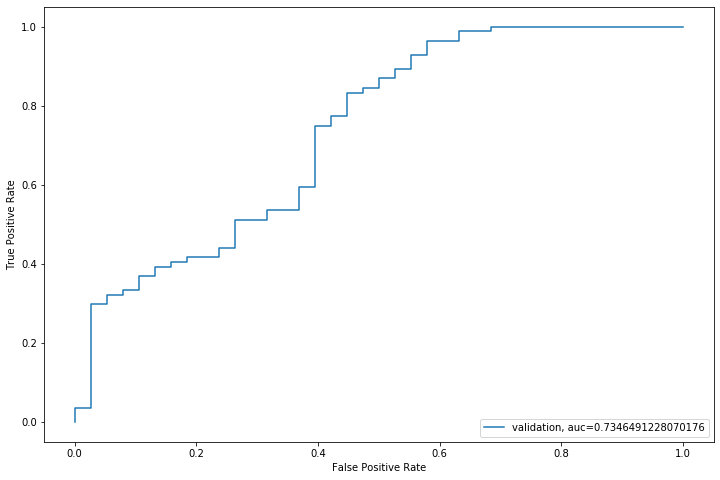

In [58]:
# Visualizing the ROC Curve

from sklearn import metrics 
fpr,tpr,_ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label = "validation, auc="+str(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.show()

We got an auc value of 0.73.

In [59]:
# Submission

Submission["Loan_Status"] = pred_test
Submission["Loan_ID"] = test_original["Loan_ID"]
Submission["Loan_Status"].replace(0,"N", inplace=True)
Submission["Loan_Status"].replace(1,"Y", inplace=True)
pd.DataFrame(Submission, columns = ["Loan_ID", "Loan_Status"]).to_csv("Logistic.csv")

Our accuracy is 0.734649.

# Feature Engineering

Now we can come up with new features that might affect the target variable
(1) Total Income
(2) EMI
(3) Balance Income

In [60]:
# Total_Income = ApplicantIncome + CoapplicantIncome

train["Total_Income"] = train["ApplicantIncome"] + train["CoapplicantIncome"]
test["Total_Income"] = test["ApplicantIncome"] + test["CoapplicantIncome"]

Let's check the distribution of Total_Income.

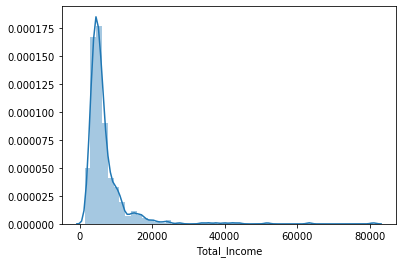

In [61]:
# Checking the distribution of Total_Income

sns.distplot(train["Total_Income"], hist = True)

We can observe that the distribution of Total_Income is pretty skewed towards the right. That is the majority of the observations lie to the left side of the graph. So let's take the log transformation to make the distribution normal.

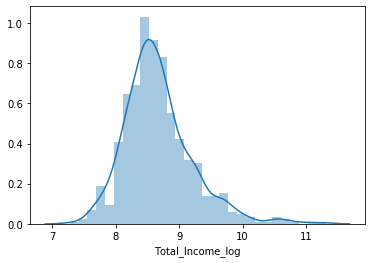

In [62]:
# Log transformation

train["Total_Income_log"] = np.log(train["Total_Income"])
sns.distplot(train["Total_Income_log"])
test["Total_Income_log"] = np.log(test["Total_Income"])

Now the distribution looks much closer to normal and the effect of extreme values has been significantly subsided.

Let's create the EMI feature now and check its distribution.

In [63]:
# EMI = LoanAmount/Loan_Amount_Term

train["EMI"] = train["LoanAmount"]/train["Loan_Amount_Term"]
test["EMI"] = test["LoanAmount"]/test["Loan_Amount_Term"]

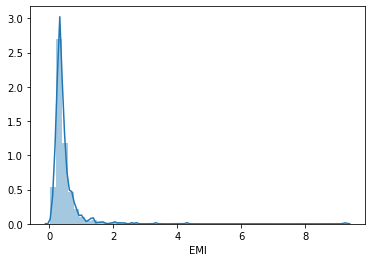

In [64]:
# Checking the distribution of EMI variable

sns.distplot(train["EMI"])

Let us create Balance Income feature now and check its distribution.

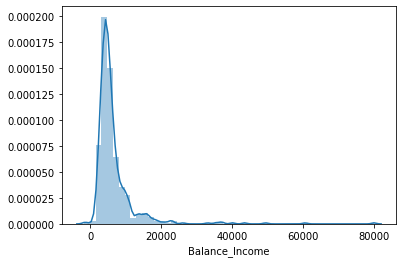

In [65]:
# Balance Income = Total Income - (EMI*1000)    (Multiplying by 1000 to make the units equal)

train["Balance_Income"] = (train["Total_Income"]) - (train["EMI"]*1000)
test["Balance_Income"] = (test["Total_Income"]) - (test["EMI"]*1000)

# Plotting the distribution

sns.distplot(train["Balance_Income"])

Let us now drop the variables which we used to create the new features. This is because correlation between those old and these new features will be very high and logistic regression assumes that the variables are not highly correlated. We also want to reduce the noise from the dataset and removing the correlated features will help in reducing the noise too.

In [66]:
train = train.drop(["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"], axis=1)
test = test.drop(["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"], axis=1)

# Model Building

We start with the logistic regression model and then move over to more complex models like RandomForest and XGBoost.
We will build the following models in this section: 
       1) Logistic Regression
       2) Decision Tree 
       3) Random Forest
       4) XGBoost

Let's prepare the data for feeding into the models.

In [67]:
# Data Preparation

x = train.drop(["Loan_Status"], 1)
y = train.Loan_Status            # Saving the target variable to a separate dataset

<B>Logistic Regression</B>

In [70]:
mean_validation_accuracy_s=0
i=1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index,test_index in kf.split(x,y):
    print("\n{} of kfold {}".format(i,kf.n_splits))
    xtr,xvl = x.loc[train_index], x.loc[test_index]
    ytr,yvl = y[train_index], y[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print("accuracy_score", score)
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]
    mean_validation_accuracy_s+= score/5
print("The mean validation accuracy score is ", mean_validation_accuracy_s)    


1 of kfold 5
accuracy_score 0.7886178861788617

2 of kfold 5
accuracy_score 0.6910569105691057

3 of kfold 5
accuracy_score 0.6666666666666666

4 of kfold 5
accuracy_score 0.7804878048780488

5 of kfold 5
accuracy_score 0.680327868852459
The mean validation accuracy score is  0.7214314274290283


In [71]:
# Submission
# Filling Loan_Status with predictions and filling Loan_ID with test Loan_ID

Submission["Loan_Status"] = pred_test
Submission["Loan_ID"] = train_original["Loan_ID"]

In [72]:
# Replacing 0 and 1 with N and Y

Submission["Loan_Status"].replace(0,"N", inplace=True)
Submission["Loan_Status"].replace(1,"Y", inplace=True)

In [73]:
# Converting Submission file to .csv format

pd.DataFrame(Submission, columns=["Loan_ID","Loan_Status"]).to_csv("Log2.csv")

From this submission, we got an accuracy of 0.721431. So, we can infer that feature engineering has not improved the model.

# Decision Tree

Decision tree is a type of supervised learning algorithm (having a pre-defined target variable). In this technique, we split the population or sample into two or more homogeneous sets based on the most significant splitter/ differentiator in input values.

In [74]:
from sklearn import tree

Let's fit the decision tree model with 5 folds of cross validation.

In [78]:
# Fitting of decision tree model

mean_accuracy_score=0
i=1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index,test_index in kf.split(x,y):
    print("\n{} of kfold {}".format(i,kf.n_splits))
    xtr,xvl = x.loc[train_index], x.loc[test_index]
    ytr,yvl = y[train_index], y[test_index]
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print("accuracy_score", score)
    i+=1
    pred_test = model.predict(test)
    mean_accuracy_score+= score/5
print("The mean accuracy score is ", mean_accuracy_score)        


1 of kfold 5
accuracy_score 0.7398373983739838

2 of kfold 5
accuracy_score 0.6991869918699187

3 of kfold 5
accuracy_score 0.7560975609756098

4 of kfold 5
accuracy_score 0.7073170731707317

5 of kfold 5
accuracy_score 0.6721311475409836
The mean accuracy score is  0.7149140343862456


The mean validation accuracy for this model is 0.714914 which is less than that of the logistic regression.

In [79]:
# Submissions
# Filling Loan_Status with predictions and Loan_ID with test Loan_ID

Submission["Loan_Status"] = pred_test
Submission["Loan_ID"] = test_original["Loan_ID"]

In [80]:
# Replacing 0 and 1 by N and Y respectively

Submission["Loan_Status"].replace(0,"N", inplace=True)
Submission["Loan_Status"].replace(1,"Y", inplace=True)

In [82]:
# Converting submission file to .csv format

pd.DataFrame(Submission, columns=["Loan_ID", "Loan_Status"]).to_csv("DecisionTree.csv")

# Random Forest

Random Forest is a tree based bootstrapping algorithm wherein a certain no. of weak learners (decision trees) are combined to make a powerful prediction.

In [83]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

mean_accuracy_score=0
i=1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index,test_index in kf.split(x,y):
    print("\n{} of kfold {}".format(i,kf.n_splits))
    xtr,xvl = x.loc[train_index], x.loc[test_index]
    ytr,yvl = y[train_index], y[test_index]
    model = RandomForestClassifier(random_state=1, max_depth=10)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print("accuracy score", score)
    i+=1
    pred_test = model.predict(test)
    mean_accuracy_score+= score/5
print("The mean accuracy score for Random Forest is", mean_accuracy_score)    


1 of kfold 5
accuracy score 0.8292682926829268

2 of kfold 5
accuracy score 0.8130081300813008

3 of kfold 5
accuracy score 0.7723577235772358

4 of kfold 5
accuracy score 0.8048780487804879

5 of kfold 5
accuracy score 0.7540983606557377
The mean accuracy score for Random Forest is 0.7947221111555378


Now, we will try to improve the accuracy by tuning the hyperparameters for this model, we will use gridsearch to get the optimized values of hyper-parameters. We will tune the max_depth and n_estimators parameters.

In [85]:
# Importing GridSeachCV from sklearn library

from sklearn.model_selection import GridSearchCV

In [88]:
#provide range of max_depth from 1-20 with an interval of 2
#provide range of n_estimators from 1-200 with an interval of 20

paramgrid = {'max_depth' : list(range(1,20,2)), 'n_estimators' : list(range(1,200,20))}
gridsearch = GridSearchCV(RandomForestClassifier(random_state=1), paramgrid)

from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv = train_test_split(x,y,test_size=0.3,random_state=1)

# Fit the grid model search
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                

In [89]:
# Estimating the optimized value

gridsearch.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=41,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

So, the optimized value for the max_depth is 5 and for n_estimator=41. Now, let's build the model using these optimized values.

In [91]:
# Model building using optimized values of max_depth and n_estimator

sum_accuracy_score=0
i=0
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index,test_index in kf.split(x,y):
    print("\n{} of kfold {}".format(i, kf.n_splits))
    xtr,xvl = x.loc[train_index],x.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = RandomForestClassifier(random_state=1, max_depth=5, n_estimators=41)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print("accuracy_score", score)
    i+=1
    pred_test = model.predict(test)
    pred2 = model.predict_proba(test)[:,1]
    sum_accuracy_score+= score
    mean_accuracy_score = ssum_accuracy_scoreccuracy_score/5
print("The mean accuracy score is ", mean_accuracy_score)    


0 of kfold 5
accuracy_score 0.8211382113821138

1 of kfold 5
accuracy_score 0.8373983739837398

2 of kfold 5
accuracy_score 0.7804878048780488

3 of kfold 5
accuracy_score 0.7804878048780488

4 of kfold 5
accuracy_score 0.7868852459016393
The mean accuracy score is  0.8012794882047182


In [92]:
# Submission

Submission["Loan_Status"] = pred_test
Submission["Loan_ID"] = test_original["Loan_ID"]

# Replacing 0 and 1 by N and Y respectively

Submission["Loan_Status"].replace(0,"N", inplace=True)
Submission["Loan_Status"].replace(1,"Y", inplace=True)

# Converting submission file to .csv format

pd.DataFrame(Submission, columns=["Loan_ID", "Loan_Status"]).to_csv("Random_Forest.csv")


We got an accuracy of 0.7947.

Let us find the feature importance now, i.e. which features are more important for this problem. We will use feature_importances_attribute of sklearn to do so

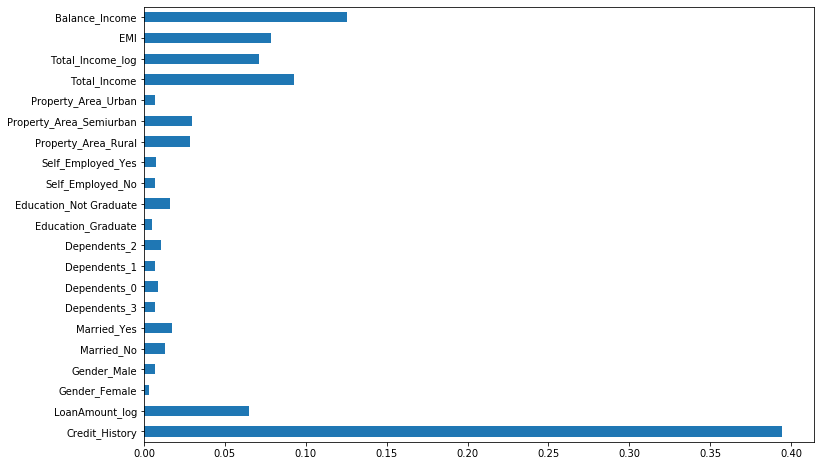

In [94]:
importances = pd.Series(model.feature_importances_, index=x.columns)
importances.plot(kind="barh", figsize=(12,8))

From the above bar graph, we can see that the Credit_History is the most important feature followed by Balanced Income, Total Income and EMI. So, feature engineering helped us in predicting our target variable.

# XGBoost

XGBoost is a fast and efficient algorithm. It works with only numerical variables and we have already replaced the categorical variables with numeric variables. let's look at the parameters that we are going to use in our model: (1) n_estimator: This specifies the no. of trees for this model. (2) max_depth: We can specify maximum depth of a tree using this parameter.

In [101]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [107]:
from xgboost.sklearn import XGBClassifier

sum_accuracy_score=0
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(x,y):
    print('\n{} of Kfold {}'.format(i,kf.n_splits))
    xtr,xvl=x.loc[train_index],x.loc[test_index]
    ytr,yvl=y[train_index],y[test_index]
    model=XGBClassifier(max_depth=4,n_estimators=50)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print("accuracy_score",score)
    i+=1
    pred_test=model.predict(test)
    pred3=model.predict_proba(test)[:,1]
    sum_accuracy_score+= score
    mean_accuracy_score = sum_accuracy_score/5
print("The mean accuracy score is", mean_accuracy_score)  


1 of Kfold 5
accuracy_score 0.7804878048780488

2 of Kfold 5
accuracy_score 0.7886178861788617

3 of Kfold 5
accuracy_score 0.7642276422764228

4 of Kfold 5
accuracy_score 0.7804878048780488

5 of Kfold 5
accuracy_score 0.7622950819672131
The mean accuracy score is 0.7752232440357191


In [108]:
# Submissions

Submission["Loan_Status"] = pred_test
Submission["Loan_ID"] = test_original["Loan_ID"]

Submission["Loan_Status"].replace(0,"N",inplace=True)
Submission["Loan_Status"].replace(1,"y",inplace=True)

pd.DataFrame(Submission, columns=["Loan_ID","Loan_Status"]).to_csv("XGBoost.csv")


 We got an accuracy of 0.77522 with this model.

So, out of all we get the best accuracy of around 0.80 with the RandomForest model and Logistic Regression model.